# Important: Get kagggle.json before running the notebook
Follow [these instructions](https://github.com/Kaggle/kaggle-api#api-credentials) to get a kaggle.json key file. Then upload it to colab.


In [14]:
#@title Run Setup And Installation { display-mode: "form" }

import torch
import warnings
import torchvision.utils as vutils
import torchvision.transforms as transforms
from data import  CelebADataModule
from assembler import assembler
from utils import get_config, load_model, plot_reconstruction, plot_samples

warnings.filterwarnings('ignore')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def make_model(model_name, use_gpu=False):
  fname = f"./configs/{model_name}.yaml"
  config = get_config(fname)
  vae = assembler(config)
  if use_gpu: vae = vae.to("cuda")
  return vae

def make_and_load_models(model_names: list, use_gpu=False):
  vaes = []
  for model_name in model_names:
    vae = make_model(model_name, use_gpu)
    vae = load_model(vae)
    vaes.append(vae)
  return vaes 

In [2]:
#@title Download data and load datamodule { display-mode: "form" }

bs = 512
IMAGE_SIZE = 64
CROP = 128
lr = 1e-3
epochs= 1
latent_dim = 256
DATA_PATH = "kaggle"

trans = []
trans.append(transforms.RandomHorizontalFlip())
if CROP > 0:
  trans.append(transforms.CenterCrop(CROP))
trans.append(transforms.Resize(IMAGE_SIZE))
trans.append(transforms.ToTensor())
transform = transforms.Compose(trans)

dm = CelebADataModule(data_dir=DATA_PATH,
                            target_type='attr',
                            train_transform=transform,
                            val_transform=transform,
                            download=True,
                            batch_size=bs)

dm.prepare_data() # force download now
dm.setup() # force make data loaders n

batch = next(iter(dm.train_dataloader()))
x, y = batch 

Files exist already


# Comparing results

In [21]:
models_to_compare = ["vanilla_vae", "info_vae", "hinge_vae", "mmd_vae", "logcosh_vae"]
figsize_reconstruction = (10, 30)
figsize_samples = (10, 10)

vaes = make_and_load_models(models_to_compare, use_gpu = True)

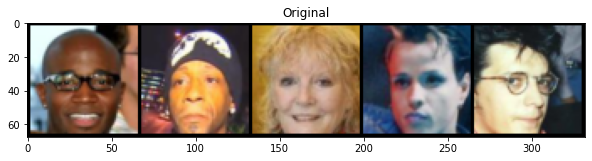

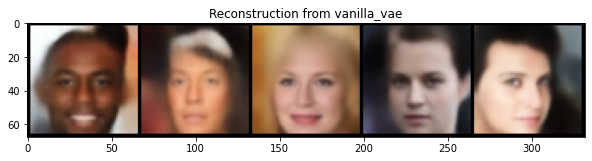

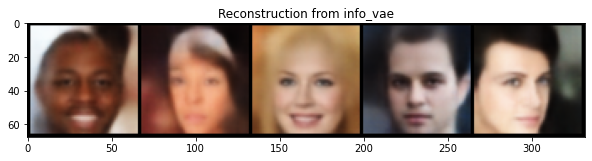

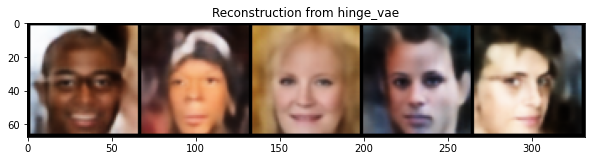

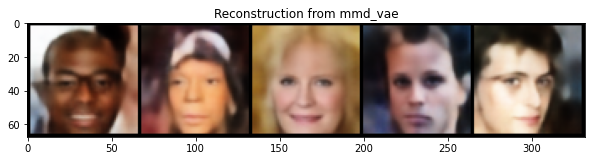

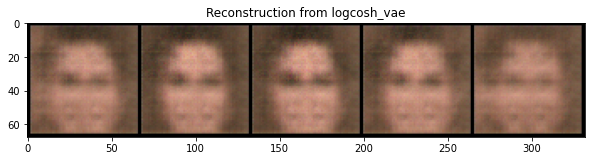

In [22]:
#@title Compare Reconstruction { display-mode: "form" }

num_imgs = 5 #@param {type:"slider", min:1, max:20, step:1}
plot_reconstruction(vaes, batch, num_of_samples=num_imgs)

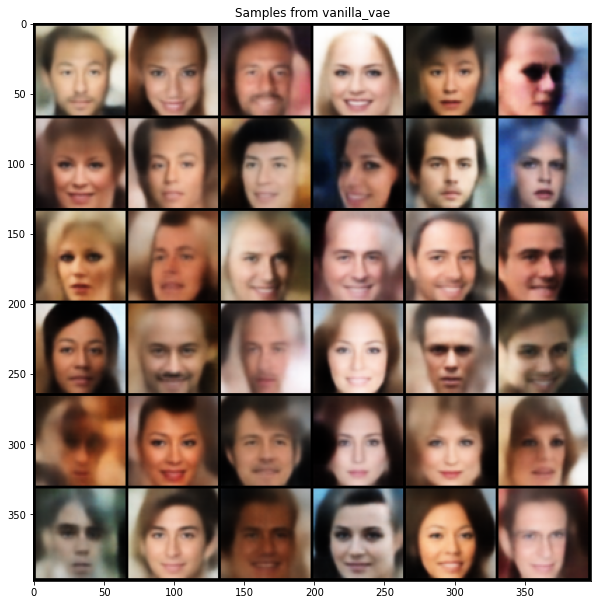

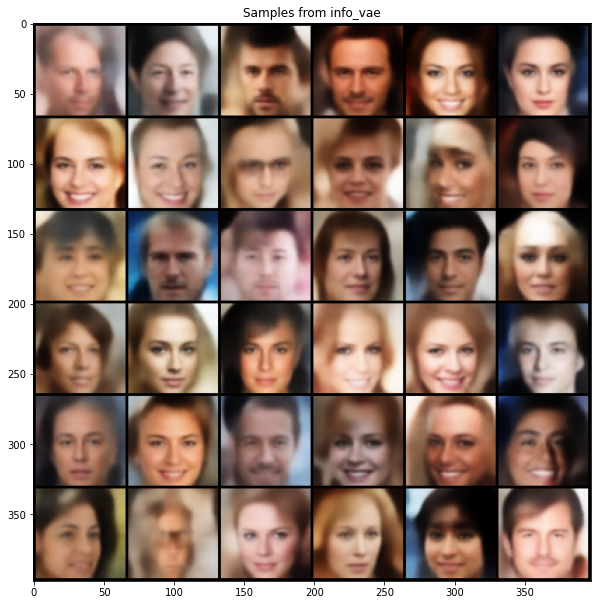

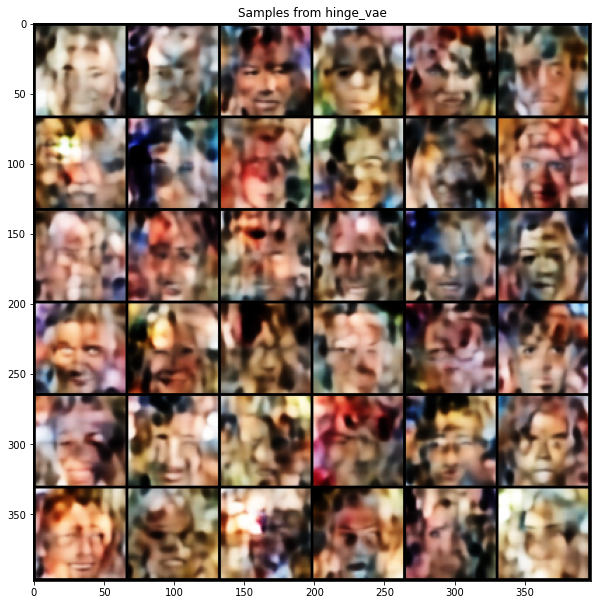

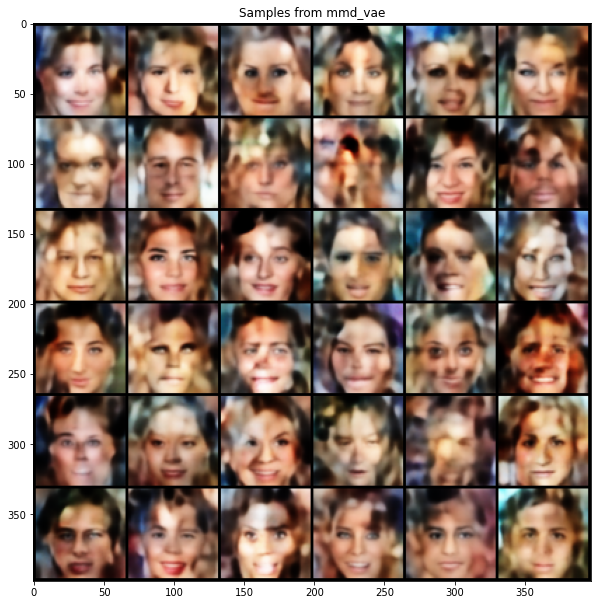

In [20]:
#@title Compare Samples

num_imgs = 36 #@param  {type:"slider", min:1, max:100, step:1}
num_of_images_per_row = 6 #@param  {type:"slider", min:1, max:100, step:1}

plot_samples(vaes, num=num_imgs, num_of_images_per_row=num_of_images_per_row)